In [34]:
# load a coffea file
from coffea.util import load
import os
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
local=""#"/run/user/1000/gvfs/sftp:host=t3ui02.psi.ch,user=mmalucch/"
prefix = local+str(
    os.environ.get("HH", "/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/out_HH4b/")
)

input = prefix + "/out_parton_matching_pnetreg_btaglead_cutflow_LM/output_all.coffea"
# input = prefix + "out_parton_matching_pnetreg_btaglead/output_all.coffea"
o = load(f"{input}")
col=o["columns"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022']['baseline']
col_medium=o["columns"]['GluGlutoHHto4B']['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022']['jet_btag_medium']
col_matched = o["columns"]["GluGlutoHHto4B"][
    "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
]["full_parton_matching"]
print(o["cutflow"])
k_old=None
for k in o["cutflow"].keys():
    print(k)
    for kk in o["cutflow"][k].keys():
        new_value=o["cutflow"][k][kk] if type(o["cutflow"][k][kk])==int else o["cutflow"][k][kk]['GluGlutoHHto4B']
        print(f"\t{new_value}")
        if k_old is not None:
            old_value=o["cutflow"][k_old][kk] if type(o["cutflow"][k_old][kk])==int else o["cutflow"][k_old][kk]['GluGlutoHHto4B']
            print(f"\t\t{kk} {new_value/old_value}")
    k_old=k

# print(
#     "skim",
#     o["cutflow"]["skim"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print(
#     "presel",
#     o["cutflow"]["presel"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print(
#     "matched",
#     o["cutflow"]["full_parton_matching"][
#         "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022"
#     ],
# )
# print("baseline",o["cutflow"]["baseline"]['GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022'])


for k in col.keys():
    col[k]=col[k].value[col[k].value!=-999]

for k in col_matched.keys():
    col_matched[k]=col_matched[k].value[col_matched[k].value!=-999]

for k in col_medium.keys():
    col_medium[k]=col_medium[k].value[col_medium[k].value!=-999]

{'initial': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 100000}, 'skim': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'presel': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': 40843}, 'lepton_veto': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 39899}}, 'four_jet': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 29047}}, 'jet_pt': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 27188}}, 'jet_btag_lead': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 26025}}, 'jet_pt_copy': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 27188}}, 'jet_btag_medium': {'GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_kl-1p00_kt-1p00_c2-0p00_2022': {'GluGlutoHHto4B': 7289}}, 'jet_pt_copy2': {'GluGlutoHHto4B_kl-1p00_k

In [2]:
len(col["events_RecoHiggs1Mass"])
len(col["events_RecoHiggs2Mass"])

10704

take only matched jet>0.2605

In [37]:
pnet=col["JetGoodHiggsMatched_btagPNetB"]
mask_loose=pnet>0.2605
print(mask_loose)
mask_loose=ak.mask(mask_loose,mask_loose)
print(len(mask_loose))
n_matched = col["JetGoodHiggsMatched_N"]
print(ak.sum(n_matched))


unflat_mask_pnet= ak.unflatten(mask_loose,n_matched)
print((unflat_mask_pnet[:3]))

pnet_unflat = ak.unflatten(pnet, n_matched)
print((pnet_unflat[:3]))


# pnet_high=pnet[~ak.is_none(mask_loose)]
pnet_high=ak.mask(pnet, mask_loose)
print(pnet_high[-5:])

print(~ak.is_none(mask_loose)[-5:])

pnet_high_unflat = ak.unflatten(pnet_high, n_matched)
print((pnet_high_unflat[-2:]))

num_matched_high= ak.num(pnet_high_unflat[~ak.is_none(pnet_high_unflat, axis=1)])
print(num_matched_high[-10:]  )
# num_matched_high= ak.num(pnet_high_unflat)
# print(num_matched_high[-3:]  )
pnet_mask=pnet_unflat[num_matched_high==4]
print(len(pnet_mask))

mask_MWP_fully_matched = num_matched_high==4
print(mask_MWP_fully_matched)
print(ak.sum(mask_MWP_fully_matched))

num_jets=ak.sum(num_matched_high)
print(num_jets)

num_jets_4matched=ak.sum(num_matched_high[mask_MWP_fully_matched])
print(num_jets_4matched)


print(len(col_medium["JetGoodHiggsMatched_btagPNetB"]))
print("medium", len(col_medium["JetGoodHiggsMatched_N"]))
mask_4matched_medium = col_medium["JetGoodHiggsMatched_N"]==4
print(len(mask_4matched_medium[mask_4matched_medium]))
unflat_jets_medium = ak.unflatten(col_medium["JetGoodHiggsMatched_btagPNetB"], col_medium["JetGoodHiggsMatched_N"])
print(len(unflat_jets_medium))
num_jets_medium=ak.num(unflat_jets_medium[mask_4matched_medium])
print(num_jets_medium)
print(ak.sum(num_jets_medium))
print(num_jets_medium[num_jets_medium!=4])

[ True  True  True ...  True  True False]
85838
85838
[[True, True], [True, True, True], [True, True, True, True]]
[[0.999, 0.994], [0.999, 0.942, 0.92], [1, 0.997, 0.996, 0.34]]
[0.953, 0.956, 0.953, 0.802, None]
[True, True, True, True, False]
[[0.999, 0.953], [0.956, 0.953, 0.802, None]]
[3, 3, 2, 3, 3, 2, 3, 3, 2, 3]
6213
[False, False, True, False, True, False, ... False, False, False, False, False]
6213
76297
24852
27974
medium 7289
6213
7289
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ... 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
24852
[]


get the higgs masses only for events fully matched where each jets is > 0.2605

In [4]:
mask_n_matched4 = n_matched==4
len(col["events_RecoHiggs1Mass"][mask_MWP_fully_matched[mask_n_matched4]])
len(col["events_RecoHiggs2Mass"][mask_MWP_fully_matched[mask_n_matched4]])
recoHiggs1Mass=col["events_RecoHiggs1Mass"][mask_MWP_fully_matched[mask_n_matched4]]
recoHiggs2Mass=col["events_RecoHiggs2Mass"][mask_MWP_fully_matched[mask_n_matched4]]
GenHiggs1Mass=col["events_GenHiggs1Mass"][mask_MWP_fully_matched[mask_n_matched4]]
GenHiggs2Mass=col["events_GenHiggs2Mass"][mask_MWP_fully_matched[mask_n_matched4]]
PNetRegRecoHiggs1Mass=col["events_PNetRegRecoHiggs1Mass"][mask_MWP_fully_matched[mask_n_matched4]]
PNetRegRecoHiggs2Mass=col["events_PNetRegRecoHiggs2Mass"][mask_MWP_fully_matched[mask_n_matched4]]
PNetRegNeutrinoRecoHiggs1Mass=col["events_PNetRegNeutrinoRecoHiggs1Mass"][mask_MWP_fully_matched[mask_n_matched4]]
PNetRegNeutrinoRecoHiggs2Mass=col["events_PNetRegNeutrinoRecoHiggs2Mass"][mask_MWP_fully_matched[mask_n_matched4]]
masses=[GenHiggs1Mass,GenHiggs2Mass,recoHiggs1Mass,recoHiggs2Mass,PNetRegRecoHiggs1Mass,PNetRegRecoHiggs2Mass,PNetRegNeutrinoRecoHiggs1Mass,PNetRegNeutrinoRecoHiggs2Mass]
for m in masses:
    print(m[:5])
    print(len(m))

mass1_reco = [recoHiggs1Mass,PNetRegRecoHiggs1Mass,PNetRegNeutrinoRecoHiggs1Mass]
mass2_reco = [recoHiggs2Mass,PNetRegRecoHiggs2Mass,PNetRegNeutrinoRecoHiggs2Mass]

[124.88056946 124.50621033 124.6747818  124.89476776 124.75081635]
6213
[124.6102829  124.60198975 124.69644165 124.87845612 124.29524231]
6213
[105.12410736 117.55789948 123.42308807 112.89285278 113.79978943]
6213
[117.31536102 106.38014221  76.75849915 109.46302032 112.72328186]
6213
[ 98.18632507 111.03018951 121.16104889 114.31118774 114.74759674]
6213
[116.55523682 103.80751038  76.80469513 108.42721558 114.88817596]
6213
[111.85739899 123.18336487 123.06640625 117.61457062 128.60818481]
6213
[118.74769592 120.23648834  80.24664307 110.59598541 117.49713898]
6213


plotting function

In [25]:
import mplhep as hep
def plot_histos(bins, reco, pnet, pnet_neutrino, num):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xlabel(f"Higgs{num}Mass [GeV]")
    ax.hist(
        reco,
        bins,
        label=f"RecoHiggs{num}Mass",
        color="blue",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet,
        bins,
        label=f"PNetRegRecoHiggs{num}Mass",
        color="red",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.hist(
        pnet_neutrino,
        bins,
        label=f"PNetRegNeutrinoRecoHiggs{num}Mass",
        color="green",
        histtype="step",
        linewidth=2,
        density=True,
    )
    ax.legend(loc="upper right")
    ax.text(
        0.75,
        0.5,
        "mean reco: {:.2f}\nmean pnet: {:.2f}\nmean pnet neutrino: {:.2f}\nstd dev reco: {:.2f}\nstd dev pnet: {:.2f}\nstd dev pnet neutrino: {:.2f}".format(
            np.mean(reco),
            np.mean(pnet),
            np.mean(pnet_neutrino),
            np.std(reco),
            np.std(pnet),
            np.std(pnet_neutrino),
        ),
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
    )
    hep.cms.label(
            year="2022",
            com="13.6",
            # label=f"Private Work ({correct_eta_bins[i]} <"
            # + r"$\eta^{Gen}$"
            # + f"< {correct_eta_bins[i+1]})",
            label=f"Private Work",
            ax=ax,
        )
    plt.show()

plot gen masses

In [20]:
def gen_masses(mass, i):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(mass, bins=60, range=(123, 126), histtype="step", linewidth=2, density=True)
    plt.xlabel(f"GenHiggs{i}Mass [GeV]")
    average = np.mean(mass)
    std_dev = np.std(mass)
    plt.text(
        0.75,
        0.5,
        "mean: {:.2f}\nstd dev: {:.2f}".format(average, std_dev),
        horizontalalignment="center",
        verticalalignment="center",
        transform=plt.gca().transAxes,
    )
    hep.cms.label(
            year="2022",
            com="13.6",
            # label=f"Private Work ({correct_eta_bins[i]} <"
            # + r"$\eta^{Gen}$"
            # + f"< {correct_eta_bins[i+1]})",
            label=f"Private Work",
        )
    # plt.savefig(f"genHiggs{i}Mass.png", dpi=300)
    fig.show()


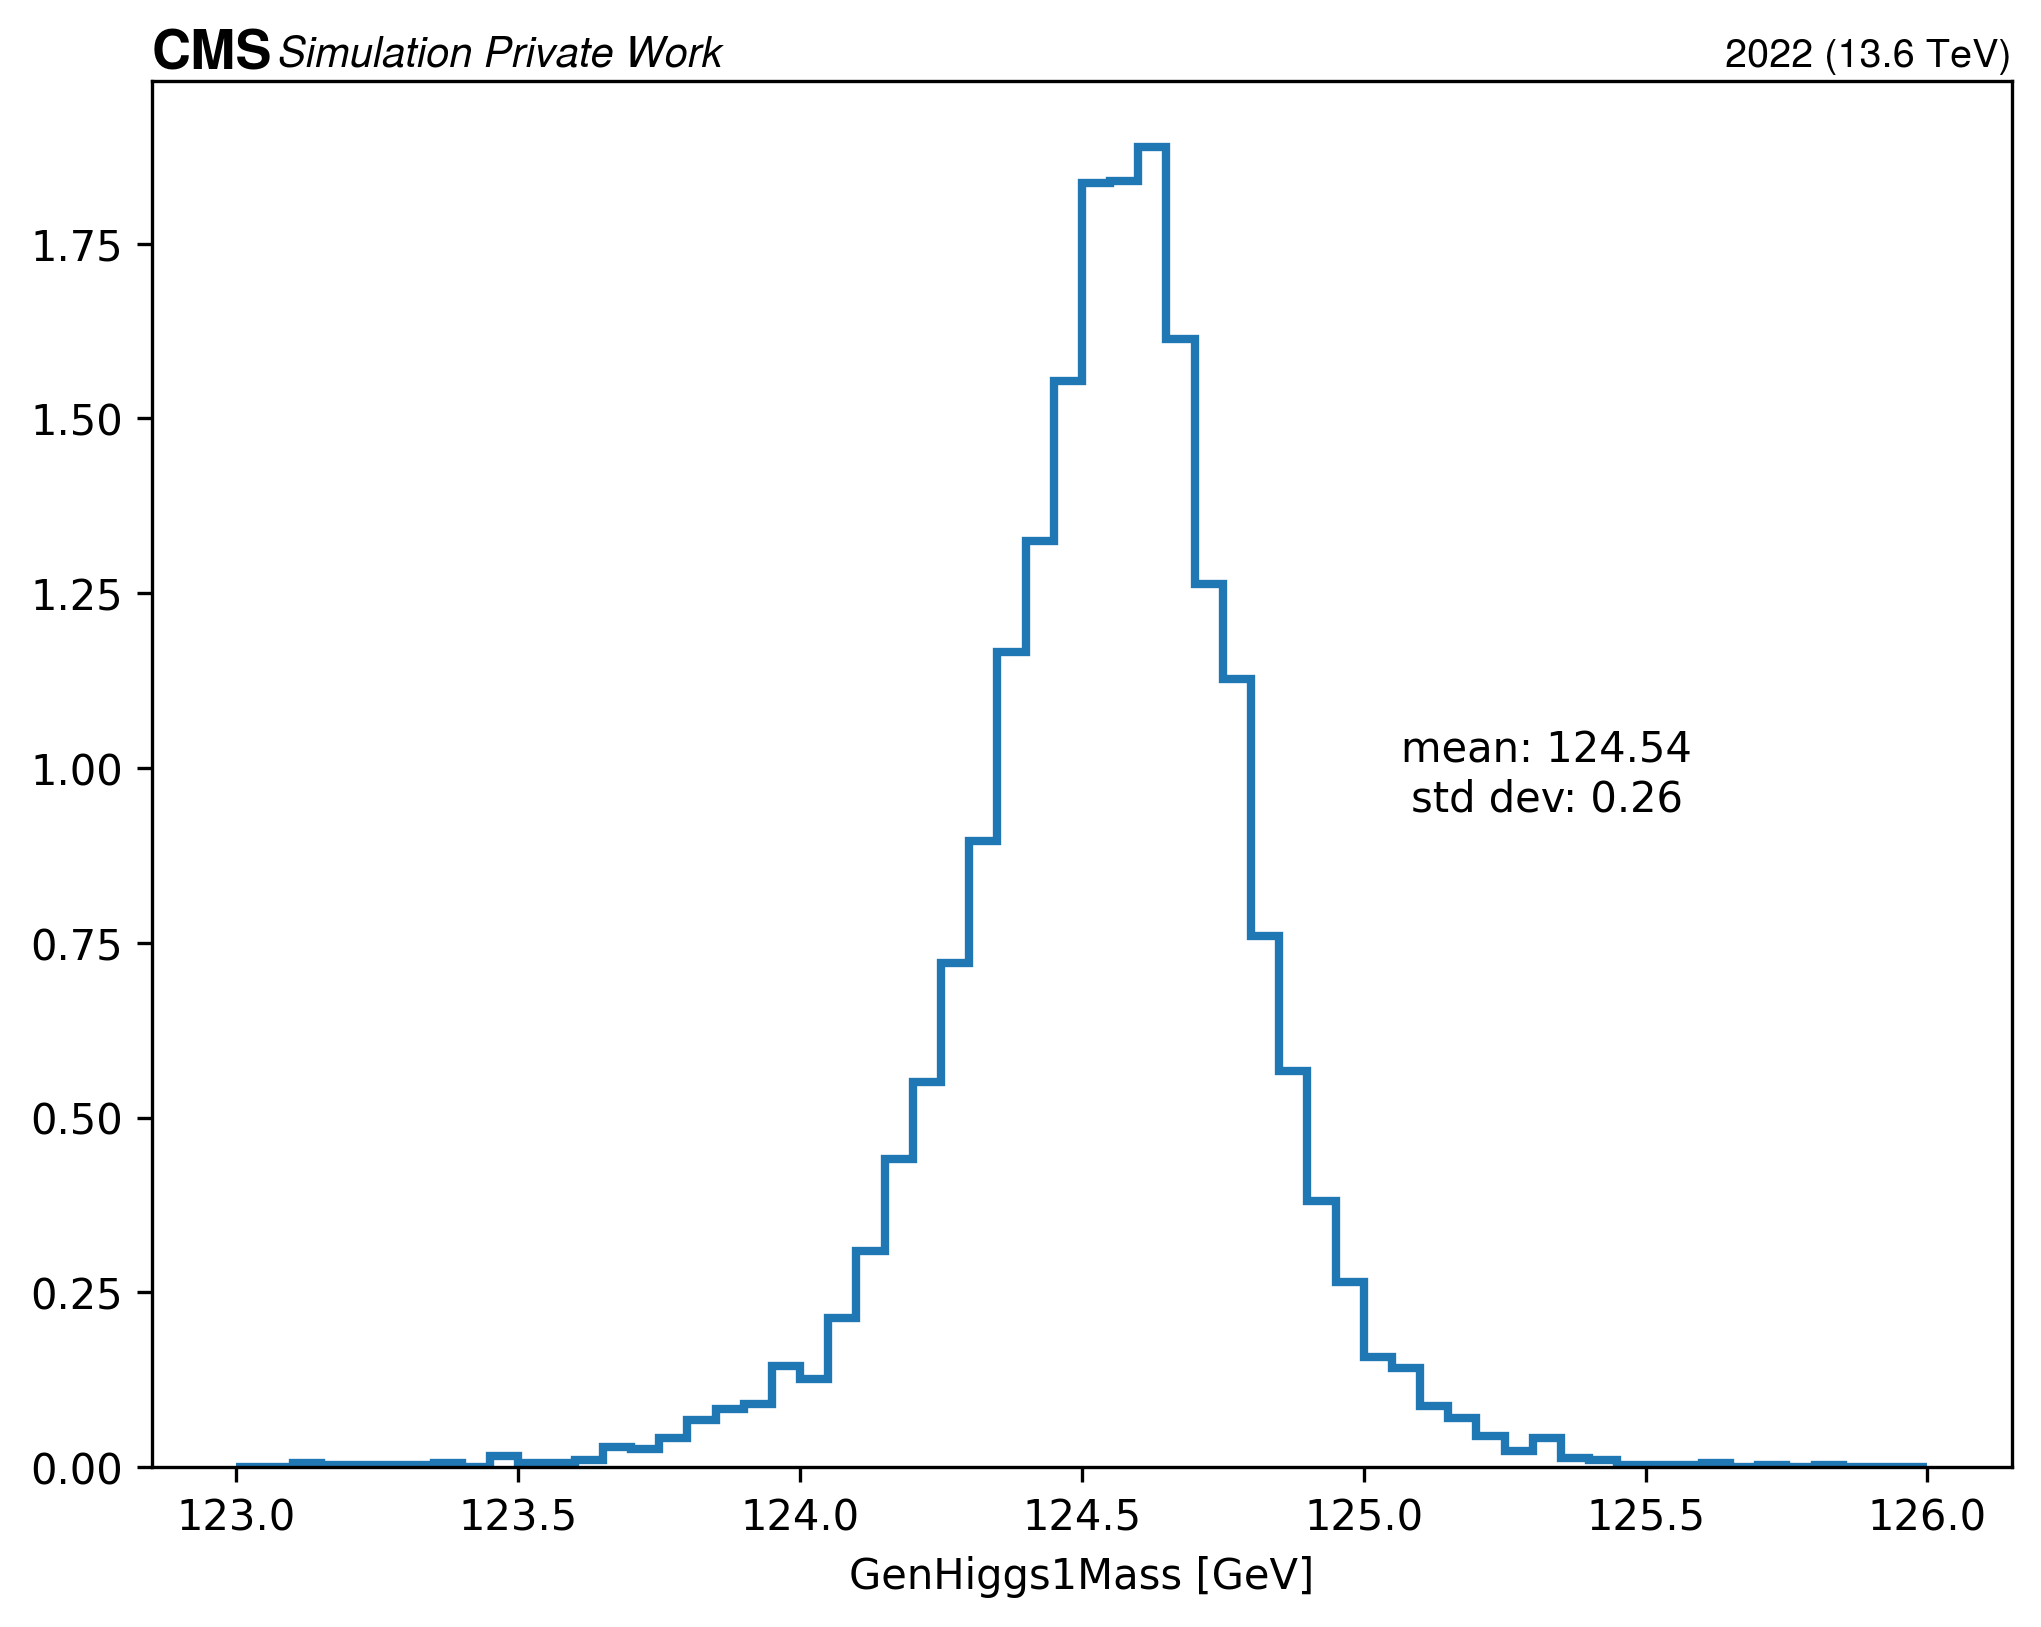

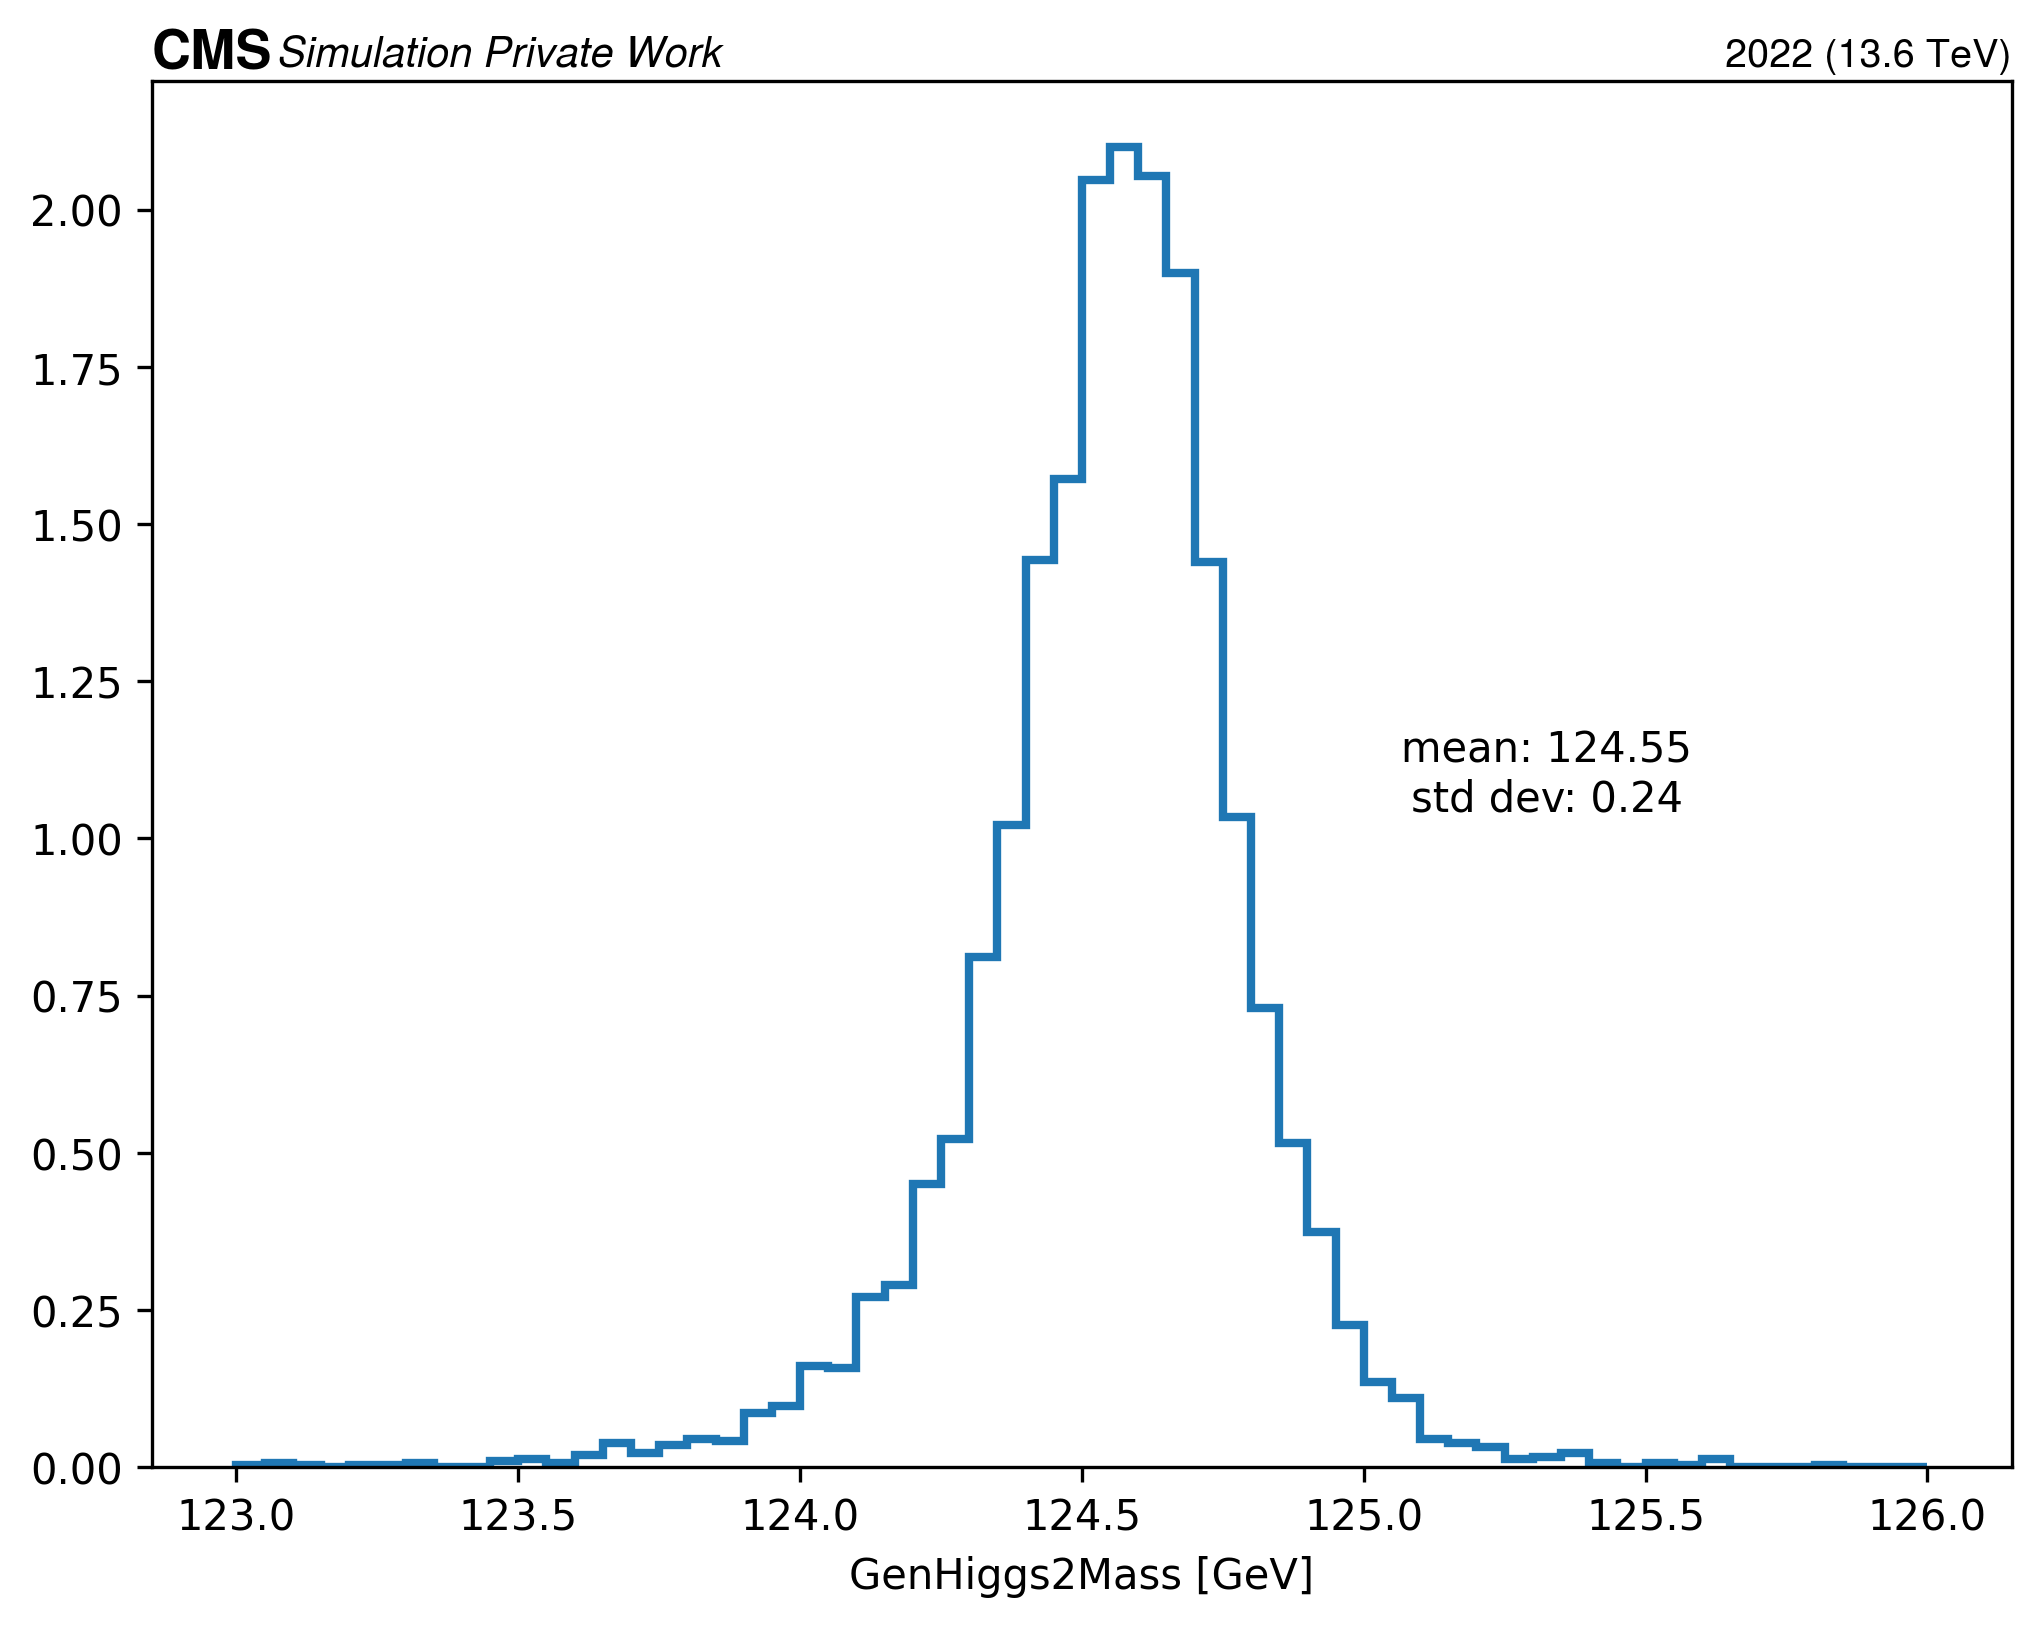

In [21]:
gen_masses(GenHiggs1Mass, 1)
gen_masses(GenHiggs2Mass, 2)

plot the reco masses

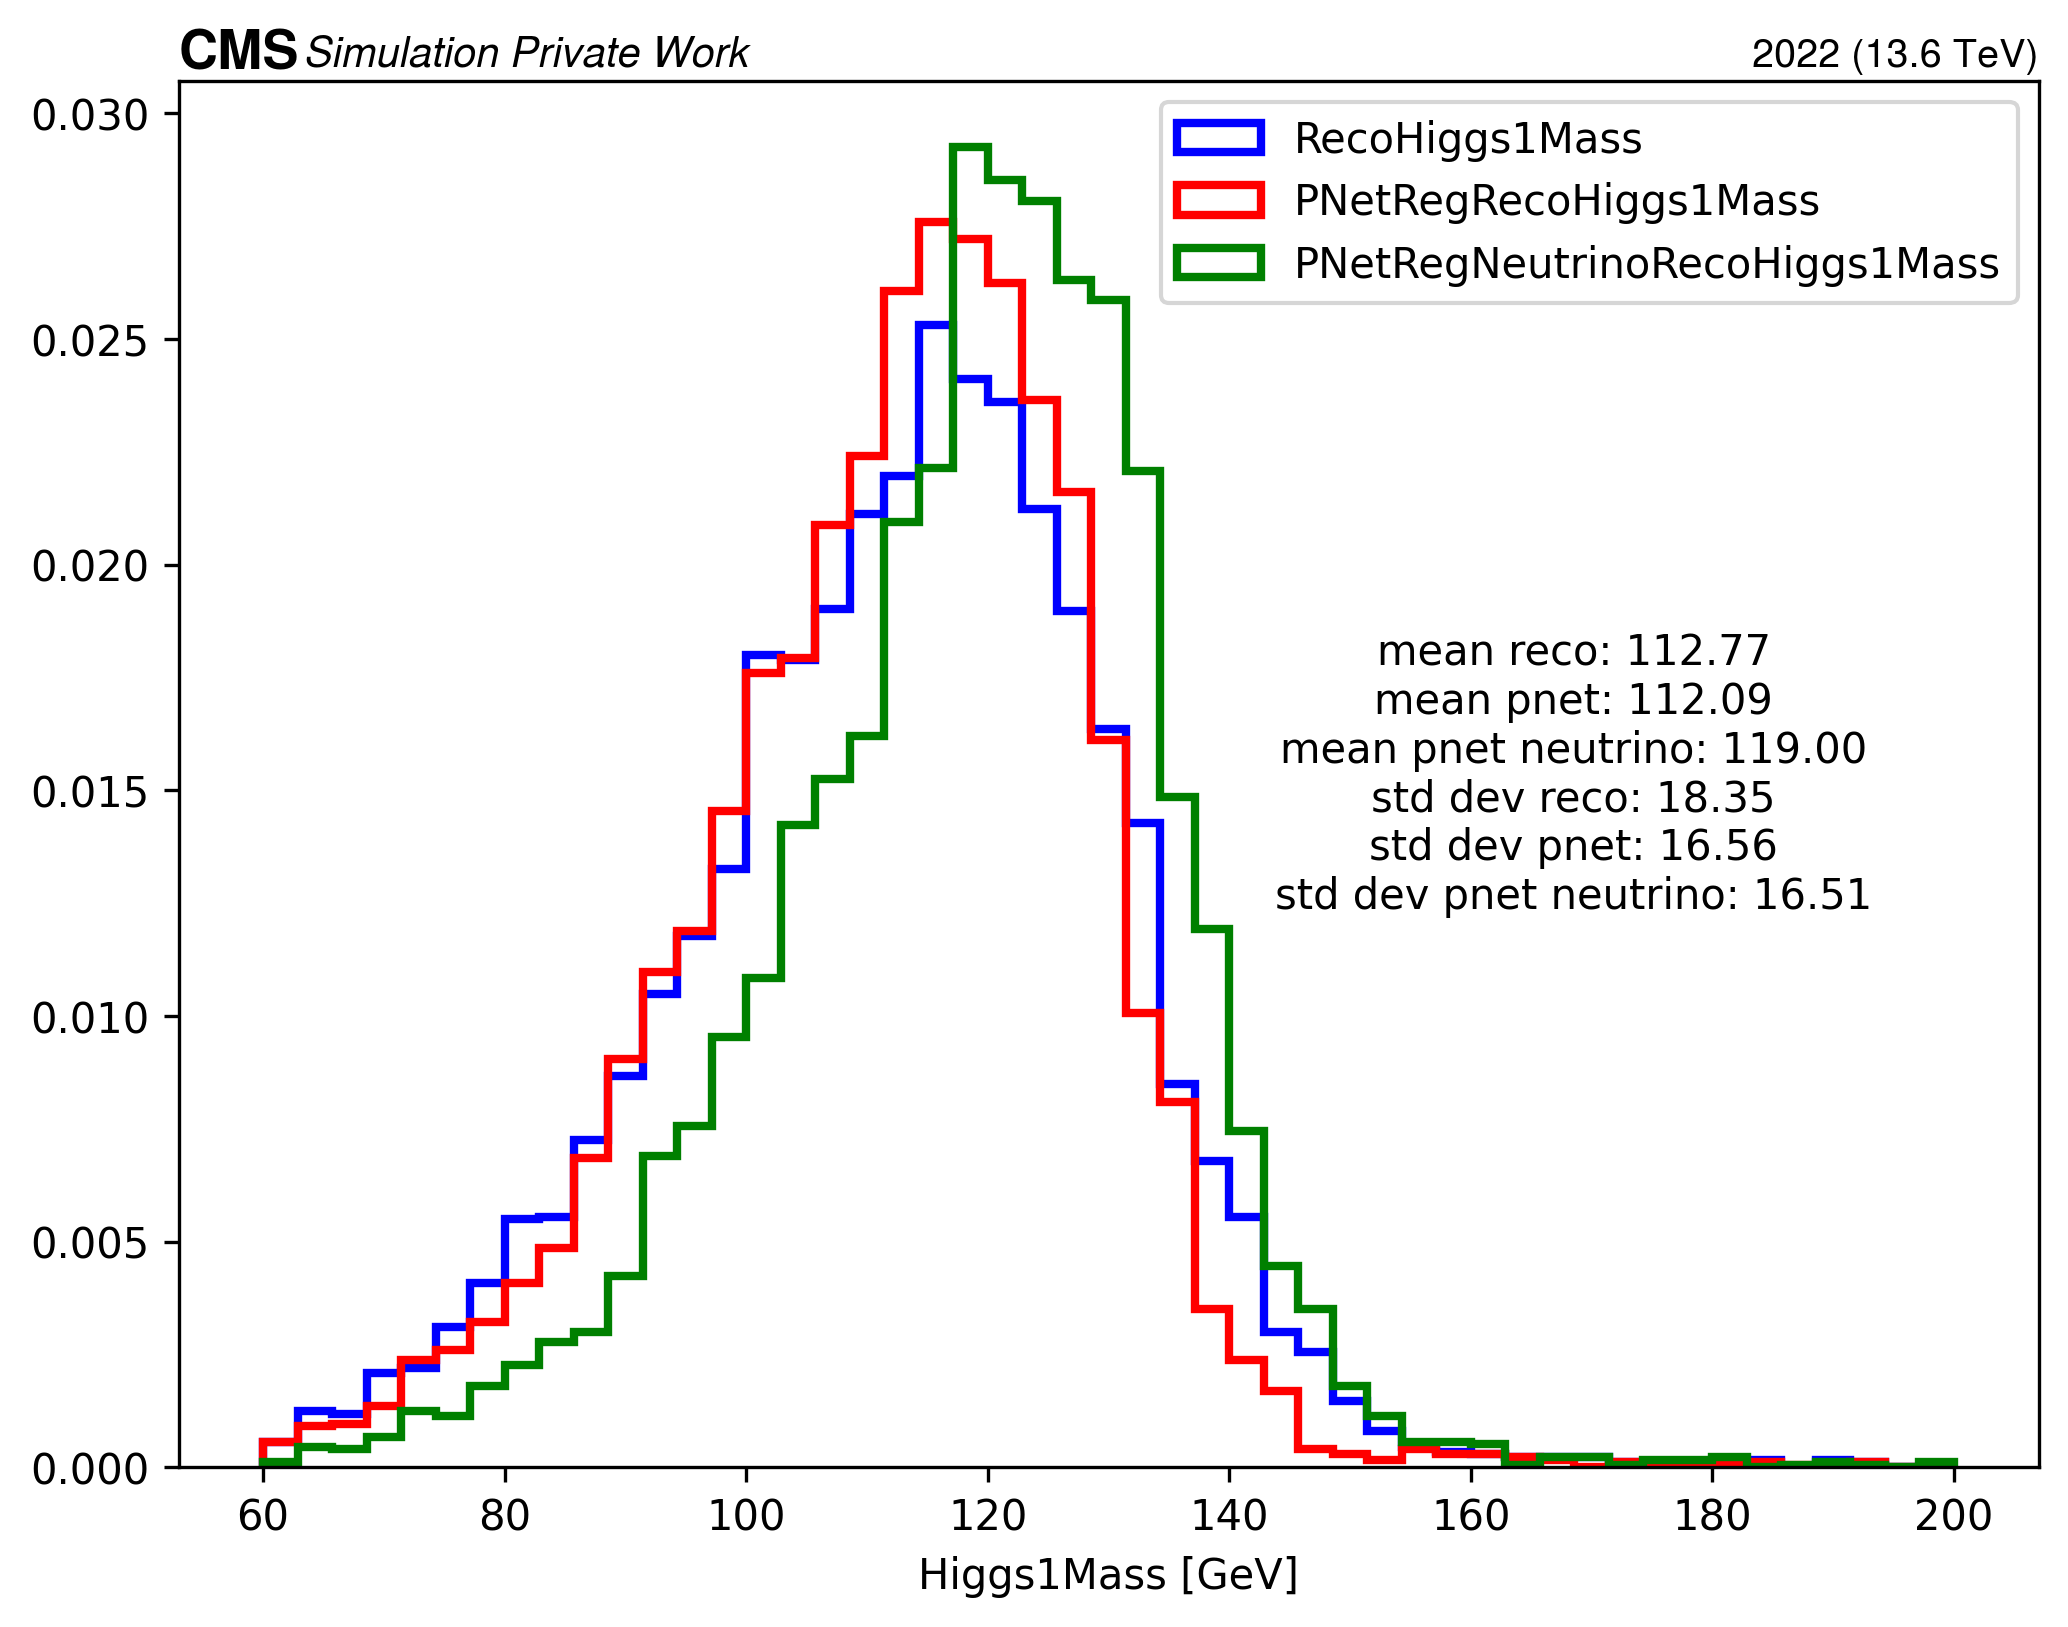

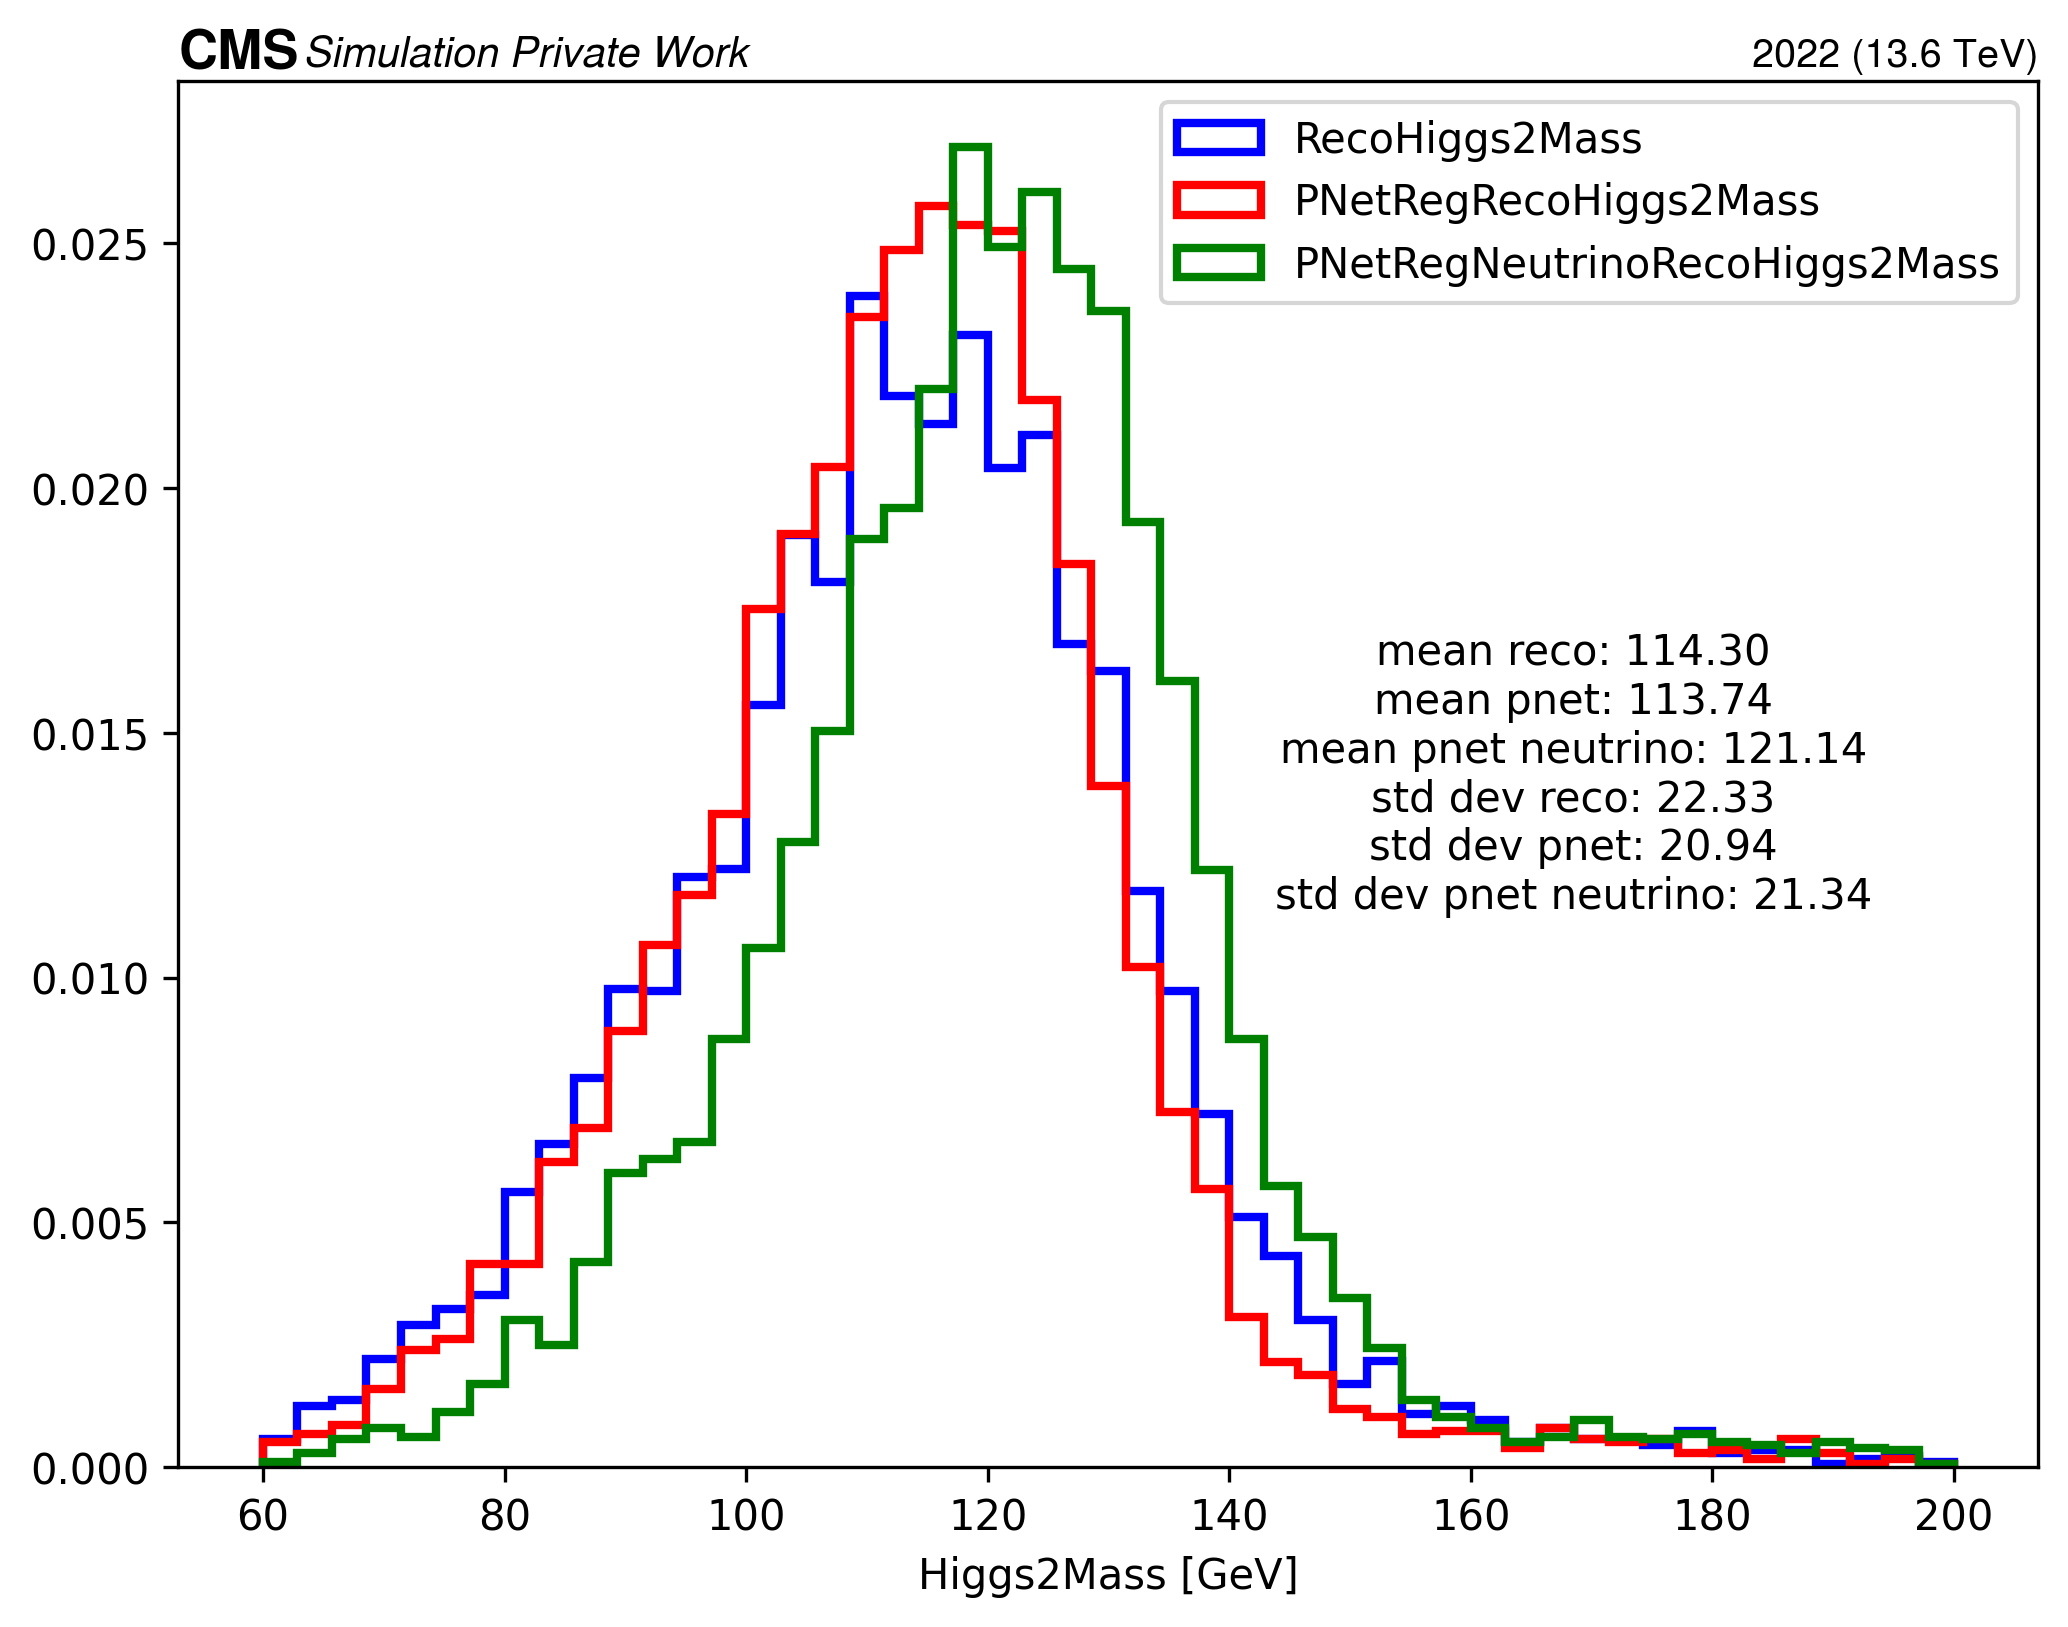

In [26]:
bins = np.linspace(60, 200, 50)
plot_histos(
    bins=bins, reco=recoHiggs1Mass, pnet=PNetRegRecoHiggs1Mass, pnet_neutrino=PNetRegNeutrinoRecoHiggs1Mass, num=1
)
plot_histos(
    bins=bins, reco=recoHiggs2Mass, pnet=PNetRegRecoHiggs2Mass, pnet_neutrino=PNetRegNeutrinoRecoHiggs2Mass, num=2
)

In [32]:
print(len(col["events_GenHiggs1Pt"][mask_MWP_fully_matched[mask_n_matched4]]))
gen_higgs_pt1=col["events_GenHiggs1Pt"][mask_MWP_fully_matched[mask_n_matched4]]
gen_higgs_pt2=col["events_GenHiggs2Pt"][mask_MWP_fully_matched[mask_n_matched4]]
mask=gen_higgs_pt1<gen_higgs_pt2
print(len(gen_higgs_pt1[mask]))

reco_higgs_pt1=col["events_RecoHiggs1Pt"][mask_MWP_fully_matched[mask_n_matched4]]
reco_higgs_pt2=col["events_RecoHiggs2Pt"][mask_MWP_fully_matched[mask_n_matched4]]
mask=reco_higgs_pt1<reco_higgs_pt2
print(len(reco_higgs_pt1[mask]))

6213
21
1555


In [35]:
col_fully_matched_mwp = {}
for k in col.keys():
    if "event" in k:
        col_fully_matched_mwp[k]=col[k][mask_MWP_fully_matched[mask_n_matched4]]
        print(len(col[k]))
        print(len(col_fully_matched_mwp[k]))

10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
10704
6213
